<a href="https://colab.research.google.com/github/FerriSlebew/1320123003-data-mining/blob/main/Titanic_Survival_Prediction_DT_RF_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [9]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [13]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
dt_model = DecisionTreeClassifier()

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)

In [16]:
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [17]:
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

Decision Tree Accuracy: 0.7318
Random Forest Accuracy: 0.8268
XGBoost Accuracy: 0.8045


Bandingkan dan Analisis perbedaan :



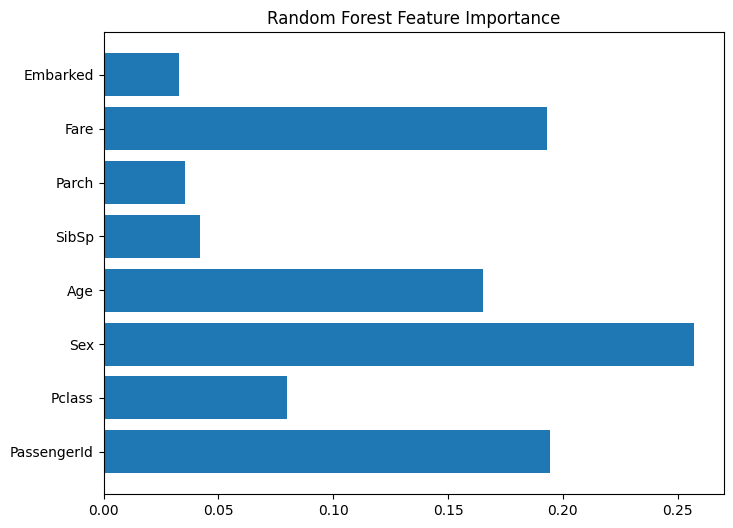

In [18]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
plt.barh(features, importances)
plt.title("Random Forest Feature Importance")
plt.show()

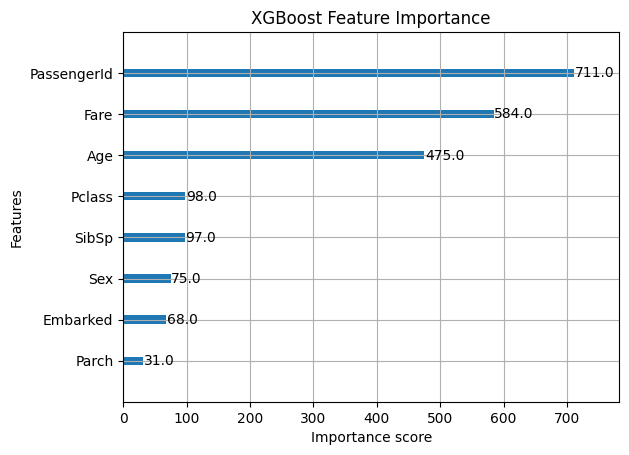

In [19]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model)
plt.title("XGBoost Feature Importance")
plt.show()

Laporan :

#Kesimpulan model terbaik :

Decision Tree Accuracy: 0.7318
Random Forest Accuracy: 0.8268
XGBoost Accuracy: 0.8045

berdasarkan hasil tersebut disimpulkan bahwa :

Random Forest menjadi model dengan performa terbaik.
Model Decision Tree memiliki akurasi paling rendah karena sifatnya yang mudah mengalami overfitting ketika diterapkan pada data kompleks. Sementara itu, XGBoost berhasil memberikan hasil yang cukup baik, namun masih kalah dari Random Forest pada dataset ini, kemungkinan karena jumlah data yang relatif sedikit sehingga keunggulan boosting belum sepenuhnya optimal.

#Analisis Feature Importance :

Random Forest menempatkan Sex sebagai fitur paling penting, sesuai dengan konteks historis Titanic di mana wanita memiliki peluang keselamatan yang lebih tinggi. Sementara itu, XGBoost justru lebih menekankan fitur numerik seperti PassengerId, diikuti oleh Fare dan Age.

Perbedaan ini terjadi karena kedua model menggunakan metode perhitungan feature importance yang berbeda. Random Forest cenderung menangkap pola sederhana dan intuitif, sedangkan XGBoost fokus pada perbaikan kesalahan secara bertahap sehingga beberapa fitur numerik mendapat bobot yang lebih tinggi.

#Rekomendasi bisnis berdasarkan insight yang ditemukan :

Prioritaskan penempatan fasilitas keselamatan yang mudah dijangkau penumpang kelas bawah.

Penyelamatan perlu mempertimbangkan jenis kelamin dan kelompok rentan (wanita & anak).

Tata letak kapal harus mengurangi ketimpangan akses antar kelas.